## Mobility of a sedimenting lattice as a function of volume fraction

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import solvePeriodic
import directSolvePeriodic
import Fourierperiodic_1_4 as me
from math import *
PI = 3.14159265359

In [2]:
#Parameters
Np=1
b, eta, dim = 1.0, 1.0/100, 3
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7663094323935531, 0.8059966052641452])

# Memory allocation
v = np.zeros(dim*Np)      
o = np.zeros(dim*Np)  
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)
T = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(Np*5)
D = np.zeros(Np*3)

mu=1.0/(6*np.pi*eta*b)

In [3]:
#(0.5236*3/(4*np.pi*b**3))**(1/3)*ta ##reverse engineer above numbers in L= ta/array()

In [4]:
L

array([16.11991954,  5.37330651,  4.02997989,  3.22398391,  2.68665326,
        2.30284565,  2.10357838,  1.99999844])

In [5]:
# phi = (4*np.pi*b**3)/(3*L**3)
# phi

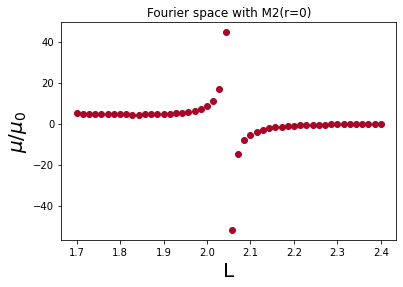

In [6]:
# Deafult value of xi = sqrt(pi)/L
b=1.

L=np.linspace(1.7,2.4)

vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(Np*5)
D = np.zeros(Np*3)

phi = (4*np.pi*b**3)/(3*L**3)


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    F[2] = -1  ## gravity                           
    
    Rbm = solvePeriodic.Rbm(b, eta, L[i], xi=sqrt(pi)/L[i])   
    Rbm.krylovSolve(v, o, F, T, S, D)
    #print(v)
    
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00   
    

#exR = [.825, .498, .356, .233, .134, .065, 0.036, 0.024]
plt.title('Fourier space with M2(r=0)')
#plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(L, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'L', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
#plt.legend(loc='upper right', shadow=True)
plt.show()

# print ('volume fraction   simulation\t Zick & Homsy (1982)')
# for i in range(np.size(L)):
#     print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

In [7]:
## weird step change - is this due to Krylov solver? Try direct solver

## decreasing xi renders contribution from Fourier space smaller 
## a good match for large volume fraction can be achieved by roughly xi = 0.81*sqrt(pi)/L[i]
## so Fourier space is doing something funny for large volume fractions! Why? 

## Checked G1s1s vs pystokes (superposition approximation) and it matches exactly - assume GR and GF are both correct



## tried a few rogue values in L=ta/array() and there is clearly something going on around L=2.25 that's weird
## Either it is the Krylov solver, or could the symmetries do something weird? 

## can test GHH

In [8]:
import numpy as np
from scipy.sparse.linalg import bicgstab, LinearOperator

In [9]:
L = np.linspace(2.3, 2.6)

In [55]:
dimH = 20
xi=sqrt(pi)/L
FH = np.zeros(dimH*len(L))
normFH = np.zeros(len(L))

for i in range(len(L)):
    def GHHFH(FH):
            GHHFH = np.zeros(dimH)
            me.GHHFH(GHHFH, L[i],xi[i], b,eta, FH)
            me.GoHHFH(GHHFH, b,eta, FH)
            return GHHFH
        
    #print(GHHFH(np.ones(dimH)))

    rhs = GHHFH(np.ones(dimH))
        
    GHHFH = LinearOperator((dimH, dimH), matvec = GHHFH)
            
    FH[i*dimH:(i+1)*dimH], exitCode = bicgstab(GHHFH, rhs, tol=1e-5)
    normFH[i] = np.linalg.norm(FH[i*dimH:(i+1)*dimH])

In [56]:
normFH

array([4.47215694, 4.47210597, 4.47215029, 4.47217871, 4.47213272,
       4.47218631, 4.47218022, 4.47212001, 4.47213197, 4.47225566,
       4.47208837, 4.47202329, 4.47215052, 4.4721349 , 4.47213497,
       4.47210418, 4.47214238, 4.47214076, 4.47212547, 4.47212907,
       4.47213803, 4.47218409, 4.47219193, 4.47214907, 4.47217605,
       4.47215066, 4.47201437, 4.47246176, 4.47199074, 4.47208585,
       4.47246613, 4.47286986, 4.47196795, 4.47216936, 4.47251252,
       4.47192271, 4.47187716, 4.47107987, 4.47238   , 4.46939248,
       4.47517336, 4.47786476, 4.48499921, 4.47123065, 4.47155596,
       4.47350191, 4.47267633, 4.46677201, 4.47215718, 4.47280311])

In [57]:
exact_soln = np.full(len(L), np.linalg.norm(np.ones(dimH)))
exact_soln

array([4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595,
       4.47213595, 4.47213595, 4.47213595, 4.47213595, 4.47213595])

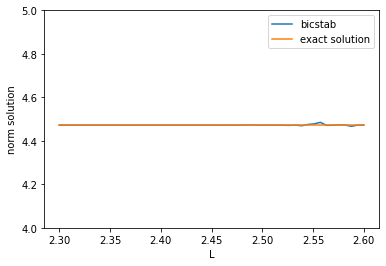

In [58]:
plt.plot(L, normFH, label='bicstab')
plt.plot(L, exact_soln, label='exact solution') 
plt.xlabel('L')
plt.ylabel('norm solution')
plt.ylim([4,5])
plt.legend()
plt.show()

In [59]:
L

array([2.3       , 2.30612245, 2.3122449 , 2.31836735, 2.3244898 ,
       2.33061224, 2.33673469, 2.34285714, 2.34897959, 2.35510204,
       2.36122449, 2.36734694, 2.37346939, 2.37959184, 2.38571429,
       2.39183673, 2.39795918, 2.40408163, 2.41020408, 2.41632653,
       2.42244898, 2.42857143, 2.43469388, 2.44081633, 2.44693878,
       2.45306122, 2.45918367, 2.46530612, 2.47142857, 2.47755102,
       2.48367347, 2.48979592, 2.49591837, 2.50204082, 2.50816327,
       2.51428571, 2.52040816, 2.52653061, 2.53265306, 2.53877551,
       2.54489796, 2.55102041, 2.55714286, 2.56326531, 2.56938776,
       2.5755102 , 2.58163265, 2.5877551 , 2.59387755, 2.6       ])

In [60]:
xi

array([0.77063211, 0.76858618, 0.76655109, 0.76452675, 0.76251307,
       0.76050997, 0.75851737, 0.75653518, 0.75456332, 0.75260172,
       0.75065029, 0.74870895, 0.74677763, 0.74485625, 0.74294473,
       0.74104299, 0.73915097, 0.73726858, 0.73539576, 0.73353242,
       0.73167851, 0.72983394, 0.72799865, 0.72617256, 0.72435562,
       0.72254774, 0.72074887, 0.71895893, 0.71717786, 0.71540559,
       0.71364206, 0.7118872 , 0.71014095, 0.70840325, 0.70667403,
       0.70495324, 0.7032408 , 0.70153666, 0.69984076, 0.69815304,
       0.69647345, 0.69480191, 0.69313838, 0.69148279, 0.6898351 ,
       0.68819524, 0.68656315, 0.68493879, 0.6833221 , 0.68171302])

Krylov on GHH seems to work fine? What happens around L=2.25?

In [61]:
L  = np.array([1.5,1.6, 1.7, 1.8,1.9, 2.1, 2.15, 2.2, 2.25, 2.3, 2.4, 2.6,2.8, 3., 4., 5., 6. ])
xi = sqrt(pi)/L

phi = (4*np.pi*b**3)/(3*L**3)
L

array([1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.4 ,
       2.6 , 2.8 , 3.  , 4.  , 5.  , 6.  ])

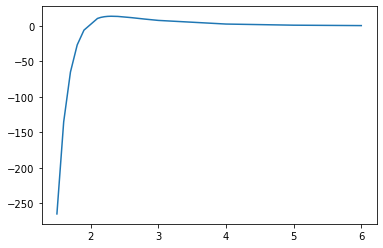

In [62]:
normGHHFH = np.zeros(len(L))
for i in range(len(L)):
    GHHFH = np.zeros(dimH)
    me.GHHFH(GHHFH, L[i],xi[i], b,eta, np.ones(dimH))
    #print(np.linalg.norm(GHHFH))
    normGHHFH[i] = np.sum(GHHFH)
plt.plot(L, normGHHFH)
plt.show()

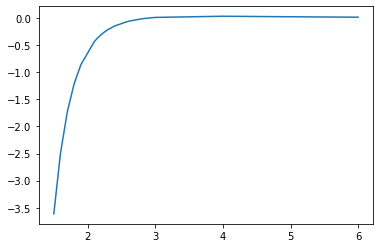

In [63]:
normGH1sF = np.zeros(len(L))
for i in range(len(L)):
    GH1sF = np.zeros(dimH)
    me.GH1sF(GH1sF, L[i],xi[i], b,eta, np.array([0,0,-1]))
    # print(np.linalg.norm(GH1sF))
    normGH1sF[i] = np.sum(GH1sF)
plt.plot(L, normGH1sF) ## weird behaviour with increasing distance
plt.show()

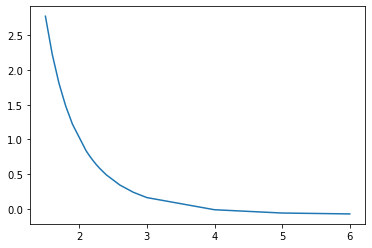

In [64]:
normG1s1sF = np.zeros(len(L))
for i in range(len(L)):
    G1s1sF = np.zeros(3)
    me.G1s1sF(G1s1sF, L[i],xi[i], b,eta, np.array([0,0,-1]))
    #print(np.linalg.norm(G1s1sF))
    normG1s1sF[i] = np.sum(G1s1sF)
plt.plot(L, normG1s1sF)
plt.show()

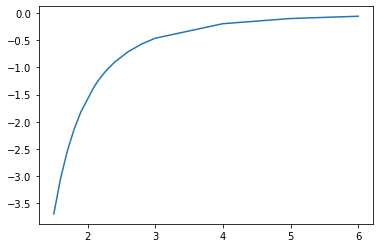

In [65]:
normG1sHFH = np.zeros(len(L))
for i in range(len(L)):
    G1sHFH = np.zeros(3)
    me.G1sHFH(G1sHFH, L[i],xi[i], b,eta, np.ones(dimH))
    #print(np.linalg.norm(G1sHFH))
    normG1sHFH[i] = np.sum(G1sHFH)
plt.plot(L, normG1sHFH)
plt.show()

In [66]:
##2 things: a) G1s1sF has a weird kink at L=5, and b)  GH1sF does something weird around 2.25-2.5, it gets stronger with distance

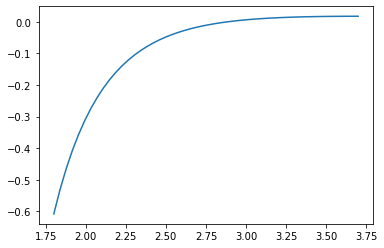

In [67]:
interval = np.linspace(1.8, 3.7)
normGH1sF = np.zeros(len(interval))
i=0
for l in interval:
    xii = sqrt(pi)/l
    GH1sF = np.zeros(dimH)
    me.GH1sF(GH1sF, l,xii, b,eta, np.array([0,0,-1]))
    #print(np.linalg.norm(GH1sF[13:]))
    normGH1sF[i] = np.sum(GH1sF[19])
    i+=1
plt.plot(interval, normGH1sF) ## weird behaviour with increasing distance
plt.show()

In [68]:
interval

array([1.8       , 1.83877551, 1.87755102, 1.91632653, 1.95510204,
       1.99387755, 2.03265306, 2.07142857, 2.11020408, 2.14897959,
       2.1877551 , 2.22653061, 2.26530612, 2.30408163, 2.34285714,
       2.38163265, 2.42040816, 2.45918367, 2.49795918, 2.53673469,
       2.5755102 , 2.61428571, 2.65306122, 2.69183673, 2.73061224,
       2.76938776, 2.80816327, 2.84693878, 2.88571429, 2.9244898 ,
       2.96326531, 3.00204082, 3.04081633, 3.07959184, 3.11836735,
       3.15714286, 3.19591837, 3.23469388, 3.27346939, 3.3122449 ,
       3.35102041, 3.38979592, 3.42857143, 3.46734694, 3.50612245,
       3.54489796, 3.58367347, 3.62244898, 3.66122449, 3.7       ])

In [69]:
interval[np.where(normGH1sF == np.amax(normGH1sF))]

array([3.7])

In [31]:
##something is going on with G3s1sF - there seems to be a minimum wrt the boxsize - check this element